# Model Interpretation and De-Standardization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import pandas as pd
import numpy as np

In [3]:
# read ogcc data
df=pd.read_csv('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/CSVs/ogcc.csv')
df.head()

,amt,gender,city_pop,is_fraud,Month,Hour,age,job_Agriculture,job_Business,job_Creative,...,region_South,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,2.86,0,333497,0,6,12,52,0,0,0,...,1,0,24.613746,0,0,0,1,0,0,0
1,29.84,1,302,0,6,12,30,0,1,0,...,0,1,104.834043,0,0,0,1,0,0,0
2,41.28,1,34496,0,6,12,49,0,0,0,...,0,0,59.204796,0,0,0,1,0,0,0
3,60.05,0,54767,0,6,12,32,0,0,1,...,1,0,27.615117,0,0,0,1,0,0,0
4,3.19,0,1126,0,6,12,65,0,0,1,...,0,0,104.423175,0,0,0,1,0,0,0


In [4]:
# read test set
test = pd.read_csv('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/CSVs/test.csv')
test.head()

,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,0.172810,0,2.736191,1.259458,0.174857,-0.769593,0,0,0,1,...,0,0.817222,0,0,0,0,0,1,0,0
1,-0.426824,0,-0.293224,-0.762579,-1.733843,1.810280,0,0,0,0,...,0,0.603204,1,0,0,0,0,0,0,0
2,-0.009970,1,0.342468,1.259458,1.055796,0.549009,0,0,0,0,...,1,0.971037,1,0,0,0,0,0,0,0
3,-0.055330,0,-0.288684,-0.762579,0.468503,-1.170907,0,0,0,0,...,0,-0.397247,0,0,0,0,0,1,0,0
4,-0.047101,0,-0.231239,-0.257069,-1.587020,2.326254,0,0,0,0,...,0,-2.146789,0,0,0,1,0,0,0,0


In [5]:
numeric_features = ['amt', 'city_pop', 'Month', 'Hour', 'age', 'distance']

In [6]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numeric features in the full dataframe
df_full_standardized = df.copy()
df_full_standardized[numeric_features] = scaler.fit_transform(df[numeric_features])

# Save the scaler parameters for later use
scaler_path = '/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/ogdata.pkl'
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Print the first few rows of the standardized full dataframe
print("Standardized Full Dataframe:")
df_full_standardized.head()

Standardized Full Dataframe:


,amt,gender,city_pop,is_fraud,Month,Hour,age,job_Agriculture,job_Business,job_Creative,...,region_South,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,-0.424463,0,0.816521,0,-1.773597,-0.118789,0.319687,0,0,0,...,1,0,-1.769819,0,0,0,1,0,0,0
1,-0.252337,1,-0.292685,0,-1.773597,-0.118789,-0.941585,0,1,0,...,0,1,0.987574,0,0,0,1,0,0,0
2,-0.179353,1,-0.178853,0,-1.773597,-0.118789,0.147695,0,0,0,...,0,0,-0.580829,0,0,0,1,0,0,0
3,-0.059605,0,-0.111371,0,-1.773597,-0.118789,-0.826924,0,0,1,...,1,0,-1.666654,0,0,0,1,0,0,0
4,-0.422358,0,-0.289942,0,-1.773597,-0.118789,1.064983,0,0,1,...,0,0,0.973451,0,0,0,1,0,0,0


In [7]:
# Load the saved scaler parameters
with open(scaler_path, 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# De-standardize the numeric features in the test set
newtest = test.copy()
newtest[numeric_features] = scaler.inverse_transform(test[numeric_features])

# Display the first few rows of the de-standardized test set
print("De-standardized Test Set:")
newtest.head()

De-standardized Test Set:


,amt,gender,city_pop,Month,Hour,age,job_Agriculture,job_Business,job_Creative,job_Education,...,region_West,distance,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,is_fraud
0,96.48,0,910148.0,12.0,14.0,33.0,0,0,0,1,...,0,99.878020,0,0,0,0,0,1,0,0
1,2.49,0,140.0,8.0,1.0,78.0,0,0,0,0,...,0,93.651632,1,0,0,0,0,0,0,0
2,67.83,1,191096.0,12.0,20.0,56.0,0,0,0,0,...,1,104.352920,1,0,0,0,0,0,0,0
3,60.72,0,1504.0,8.0,16.0,26.0,0,0,0,0,...,0,64.545722,0,0,0,0,0,1,0,0
4,62.01,0,18760.0,9.0,2.0,87.0,0,0,0,0,...,0,13.646644,0,0,0,1,0,0,0,0


In [8]:
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

## Best Model

In [9]:
# Load the saved model
with open('/content/drive/MyDrive/23 24/Spring 24/Thesis 2/Thesis/Models/CV pickles/ros_rf.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

### Feature Importance and Root Nodes

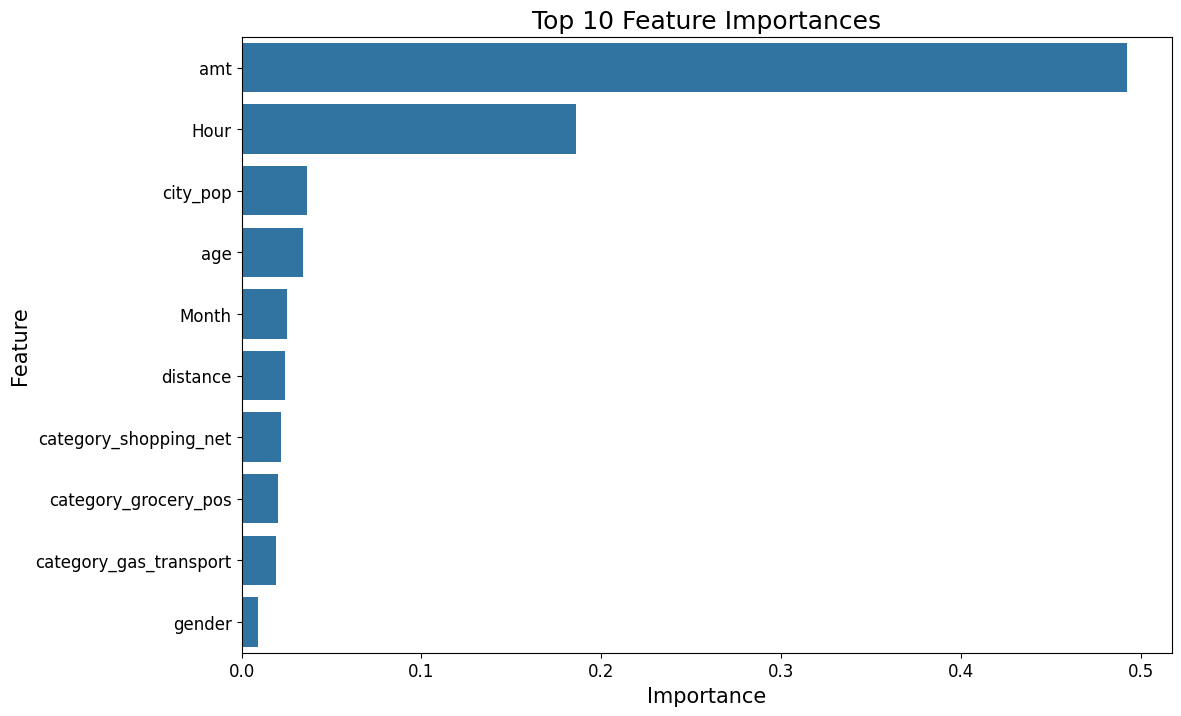

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model is already defined and trained
# Get feature importances from the model
feature_importances = model.feature_importances_

# Get feature names from the test set
feature_names = X_test.columns

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plot the top 10 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances_df.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances', fontsize=18)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Get the number of trees in the model
num_trees = len(model.estimators_)
print(f"The number of trees in the random forest model: {num_trees}")

The number of trees in the random forest model: 100


In [ ]:
first_tree = model.estimators_[0]
# Get the decision path for the first sample in X_test
sample_id = 1  # Index of the sample in X_test you want to analyze
X_sample = X_test.iloc[sample_id].values.reshape(1, -1)

# Get the decision path for the first tree
decision_path = first_tree.decision_path(X_sample)

# Convert to dense format for easier viewing (optional)
dense_decision_path = decision_path.toarray()
print(dense_decision_path)

[[1 1 1 ... 0 0 0]]


In [ ]:
# Get the node indicator and feature indices
node_indicator = decision_path
feature = first_tree.tree_.feature
threshold = first_tree.tree_.threshold
feature_names = X_test.columns

# Display the decision path
node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

print(f'Decision path for sample {sample_id}:\n')
for node_id in node_index:
    if node_id == node_index[-1]:
        print(f"Leaf node reached, node {node_id}")
    else:
        if X_sample[0, feature[node_id]] <= threshold[node_id]:
            threshold_sign = "<="
        else:
            threshold_sign = ">"
        print(f"Node {node_id}: (X[{feature_names[feature[node_id]]}] = {X_sample[0, feature[node_id]]}) {threshold_sign} {threshold[node_id]}")


Decision path for sample 1:

Node 0: (X[category_personal_care] = 0.0) <= 0.5
Node 1: (X[Month] = -0.7625786389226005) <= 1.0067033767700195
Node 2: (X[category_misc_net] = 0.0) <= 0.5
Node 3: (X[amt] = -0.426823622032252) <= 1.096949279308319
Node 4: (X[job_Social_Services] = 0.0) <= 0.5
Node 5: (X[category_shopping_pos] = 1.0) > 0.5
Leaf node reached, node 1839


In [ ]:
# Access the tree structure
tree = first_tree.tree_

# The root node is always node 0
root_node = 0

# Information about the root node
root_feature = tree.feature[root_node]
root_threshold = tree.threshold[root_node]
root_impurity = tree.impurity[root_node]
root_samples = tree.n_node_samples[root_node]
root_value = tree.value[root_node]

# Assuming X_test is a DataFrame with feature names
feature_names = X_test.columns
root_feature_name = feature_names[root_feature]

print(f"Root node feature: {root_feature_name}")
print(f"Root node threshold: {root_threshold}")
print(f"Root node impurity: {root_impurity}")
print(f"Number of samples at root node: {root_samples}")
print(f"Value at root node: {root_value}")

Root node feature: category_personal_care
Root node threshold: 0.5
Root node impurity: 0.4999994814482097
Number of samples at root node: 560433
Value at root node: [[442408. 443310.]]


### Tree Depths

In [ ]:
# Function to compute the depth of a tree
def get_tree_depth(tree):
    return tree.tree_.max_depth

# Find the tree with the least depth
min_depth = float('inf')
min_depth_tree = None

for tree in model.estimators_:
    depth = get_tree_depth(tree)
    if depth < min_depth:
        min_depth = depth
        min_depth_tree = tree

print(f"The minimum depth of a tree in the forest is {min_depth}")

The minimum depth of a tree in the forest is 33


In [ ]:
print(f"The maximum depth of a tree in the forest is {get_tree_depth(tree)}")

The maximum depth of a tree in the forest is 37


### Visualizations and Decision Paths

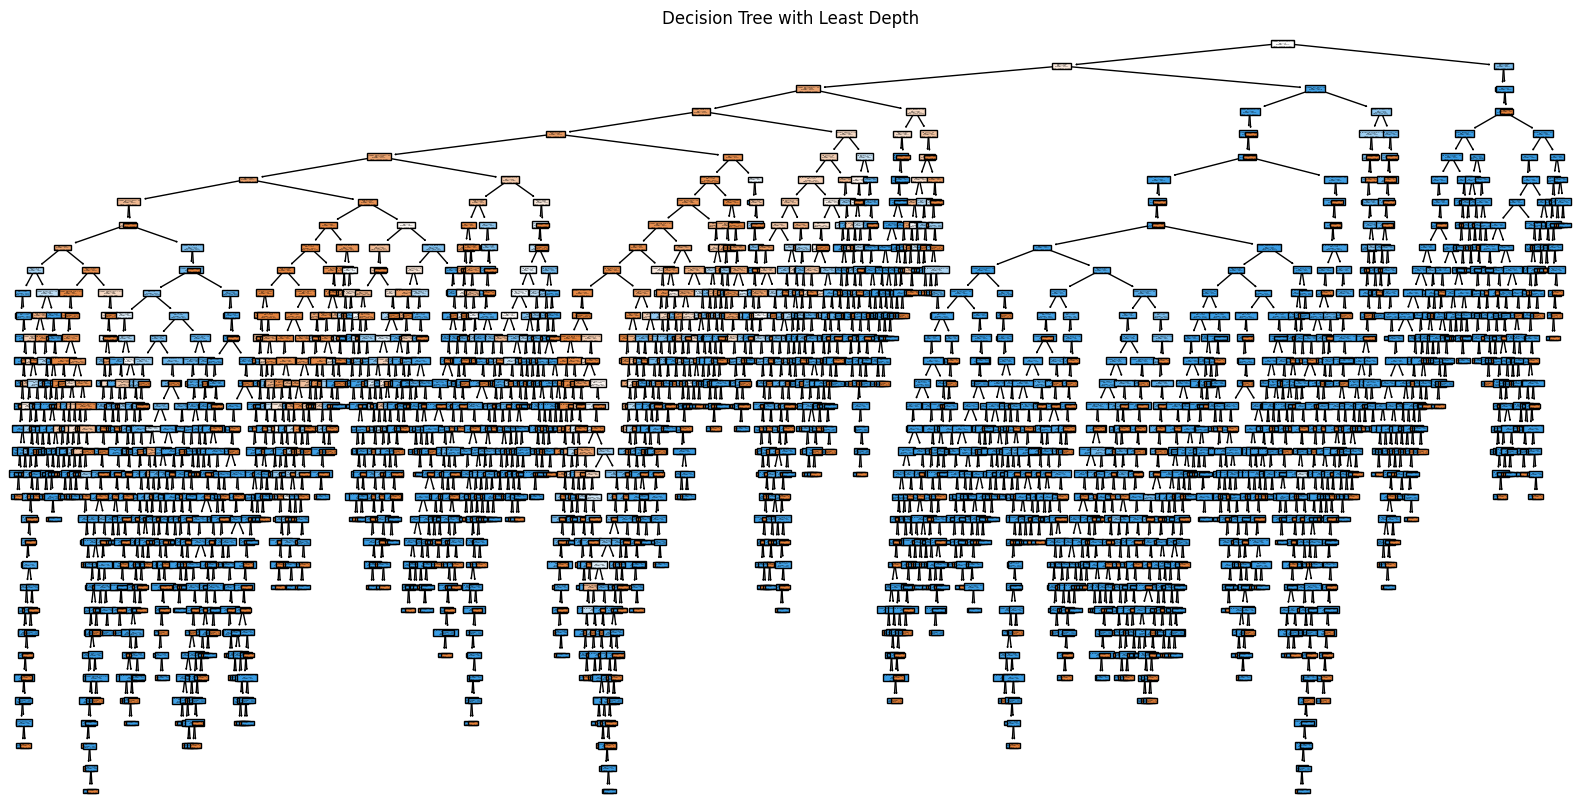

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the tree with the least depth
plt.figure(figsize=(20,10))
plot_tree(min_depth_tree, feature_names=X_test.columns, filled=True)
plt.title("Decision Tree with Least Depth")
plt.show()

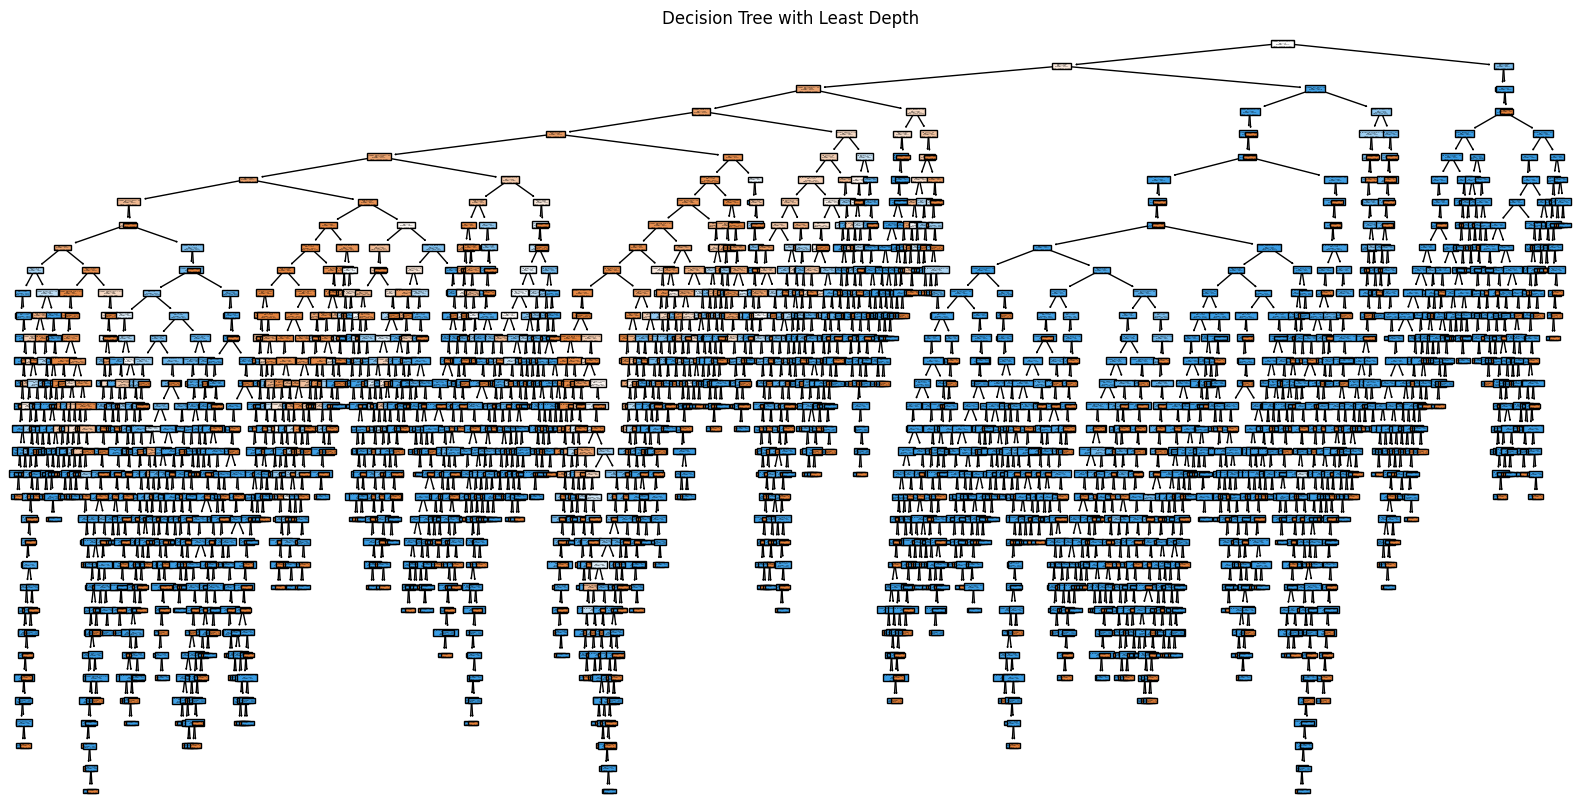

In [ ]:
# Plot the tree with the least depth and save it as an image
plt.figure(figsize=(20,10))
plot_tree(min_depth_tree, feature_names=X_test.columns, filled=True)
plt.title("Decision Tree with Least Depth")
plt.savefig("decision_tree_least_depth.png", dpi=300)  # Save the plot with higher resolution
plt.show()

In [ ]:
# Access the tree structure
tree = min_depth_tree.tree_

# Define a function to print the first few branches of the tree
def print_first_branches(node, depth=0, max_depth=2):
    indent = "    " * depth
    if depth <= max_depth:
        if tree.feature[node] != -2:  # -2 indicates a leaf node
            name = X_test.columns[tree.feature[node]]
            threshold = tree.threshold[node]
            print(f"{indent}Node {node}: (X[{name}] <= {threshold})")
            print(f"{indent}If true:")
            print_first_branches(tree.children_left[node], depth + 1, max_depth)
            print(f"{indent}If false:")
            print_first_branches(tree.children_right[node], depth + 1, max_depth)
        else:
            print(f"{indent}Leaf node {node}, value: {tree.value[node]}")

# Print the first few branches starting from the root node
print_first_branches(0)

Node 0: (X[category_shopping_net] <= 0.5)
If true:
    Node 1: (X[amt] <= 1.096949279308319)
    If true:
        Node 2: (X[category_gas_transport] <= 0.5)
        If true:
        If false:
    If false:
        Node 2173: (X[category_misc_pos] <= 0.5)
        If true:
        If false:
If false:
    Node 3298: (X[amt] <= 4.154256105422974)
    If true:
        Leaf node 3299, value: [[32150.     0.]]
    If false:
        Node 3300: (X[amt] <= 7.450707912445068)
        If true:
        If false:


In [ ]:
# Access the tree structure
tree = min_depth_tree.tree_

# The root node is always node 0
root_node = 0

# Information about the root node
root_feature = tree.feature[root_node]
root_threshold = tree.threshold[root_node]
root_impurity = tree.impurity[root_node]
root_samples = tree.n_node_samples[root_node]
root_value = tree.value[root_node]

# Assuming X_test is a DataFrame with feature names
feature_names = X_test.columns
root_feature_name = feature_names[root_feature]

print(f"Root node feature: {root_feature_name}")
print(f"Root node threshold: {root_threshold}")
print(f"Root node impurity: {root_impurity}")
print(f"Number of samples at root node: {root_samples}")
print(f"Value at root node: {root_value}")

Root node feature: category_shopping_net
Root node threshold: 0.5
Root node impurity: 0.4999995041889139
Number of samples at root node: 559690
Value at root node: [[442418. 443300.]]


In [ ]:
# Access the tree structure
tree = min_depth_tree.tree_

# Define a function to print the first few branches of the tree
def print_first_branches(node, depth=0, max_depth=4):
    indent = "    " * depth
    if depth <= max_depth:
        if tree.feature[node] != -2:  # -2 indicates a leaf node
            name = newtest.drop('is_fraud',axis=1).columns[tree.feature[node]]
            threshold = tree.threshold[node]
            print(f"{indent}Node {node}: (X[{name}] <= {threshold})")
            print(f"{indent}If true:")
            print_first_branches(tree.children_left[node], depth + 1, max_depth)
            print(f"{indent}If false:")
            print_first_branches(tree.children_right[node], depth + 1, max_depth)
        else:
            print(f"{indent}Leaf node {node}, value: {tree.value[node]}")

# Print the first few branches starting from the root node
print_first_branches(0)

Node 0: (X[category_shopping_net] <= 0.5)
If true:
    Node 1: (X[amt] <= 1.096949279308319)
    If true:
        Node 2: (X[category_gas_transport] <= 0.5)
        If true:
            Node 3: (X[category_travel] <= 0.5)
            If true:
                Node 4: (X[Month] <= 0.5011942312121391)
                If true:
                If false:
            If false:
                Node 1793: (X[weekday_Saturday] <= 0.5)
                If true:
                If false:
        If false:
            Node 2082: (X[weekday_Monday] <= 0.5)
            If true:
                Node 2083: (X[amt] <= -0.29103051126003265)
                If true:
                If false:
            If false:
                Node 2132: (X[job_Legal] <= 0.5)
                If true:
                If false:
    If false:
        Node 2173: (X[category_misc_pos] <= 0.5)
        If true:
            Node 2174: (X[category_kids_pets] <= 0.5)
            If true:
                Node 2175: (X[category_trav

In [ ]:
# Get the indices of all float64 features in the DataFrame
numeric_columns_index = [df_de_standardized.columns.get_loc(col) for col in df_de_standardized.select_dtypes(include=np.float64).columns]
numeric_columns_index

[0, 2, 4, 5, 6, 34]

In [ ]:
# Select numeric columns for de-standardization
numeric_columns = ['amt', 'city_pop', 'Month', 'Hour', 'age', 'distance']

# Example means and standard deviations for numeric features (replace with actual values)
numeric_means = df[numeric_columns].mean()
numeric_std_devs = df[numeric_columns].std()

# De-standardize only the numeric features in the DataFrame
df_de_standardized = df.copy()
df_de_standardized[numeric_columns] = df[numeric_columns] * numeric_std_devs.values + numeric_means.values

# Access the tree structure
tree = min_depth_tree.tree_

# Define a function to plot the first few branches of the tree
def plot_first_branches(node, depth=0, max_depth=2):
    indent = "    " * depth
    if depth <= max_depth:
        if tree.feature[node] != -2:  # -2 indicates a leaf node
            feature_index = tree.feature[node]
            if feature_index in numeric_columns_index:
                name = numeric_columns[feature_index]
                threshold = tree.threshold[node]
                print(f"{indent}Node {node}: (X[{name}] <= {threshold})")
                print(f"{indent}If true:")
                plot_first_branches(tree.children_left[node], depth + 1, max_depth)
                print(f"{indent}If false:")
                plot_first_branches(tree.children_right[node], depth + 1, max_depth)
            else:
                threshold = tree.threshold[node]
                name = X_test.columns[feature_index]
                print(f"{indent}Node {node}: (X[{name}] <= {threshold})")
                print(f"{indent}If true:")
                plot_first_branches(tree.children_left[node], depth + 1, max_depth)
                print(f"{indent}If false:")
                plot_first_branches(tree.children_right[node], depth + 1, max_depth)
        else:
            print(f"{indent}Leaf node {node}, value: {tree.value[node]}")

# Plot the first few branches starting from the root node
plot_first_branches(0)

Node 0: (X[category_shopping_net] <= 0.5)
If true:
    Node 1: (X[amt] <= 1.096949279308319)
    If true:
        Node 2: (X[category_gas_transport] <= 0.5)
        If true:
        If false:
    If false:
        Node 2173: (X[category_misc_pos] <= 0.5)
        If true:
        If false:
If false:
    Node 3298: (X[amt] <= 4.154256105422974)
    If true:
        Leaf node 3299, value: [[32150.     0.]]
    If false:
        Node 3300: (X[amt] <= 7.450707912445068)
        If true:
        If false:


In [ ]:
def plot_first_branches(node, depth=0, max_depth=2):
    indent = "    " * depth
    if depth <= max_depth:
        if tree.feature[node] != -2:  # -2 indicates a leaf node
            feature_index = tree.feature[node]
            if feature_index in numeric_columns_index:
                name = numeric_columns[feature_index]
                threshold = tree.threshold[node]
                de_standardized_value = X_test.iloc[node][name] * numeric_std_devs[name] + numeric_means[name]
                print(f"{indent}Node {node}: (X[{name}] <= {threshold}) De-standardized Value: {de_standardized_value}")
                print(f"{indent}If true:")
                plot_first_branches(tree.children_left[node], depth + 1, max_depth)
                print(f"{indent}If false:")
                plot_first_branches(tree.children_right[node], depth + 1, max_depth)
            else:
                threshold = tree.threshold[node]
                name = X_test.columns[feature_index]
                print(f"{indent}Node {node}: (X[{name}] <= {threshold})")
                print(f"{indent}If true:")
                plot_first_branches(tree.children_left[node], depth + 1, max_depth)
                print(f"{indent}If false:")
                plot_first_branches(tree.children_right[node], depth + 1, max_depth)
        else:
            # Get the class with the highest count as the predicted class
            predicted_class = "Legitimate" if tree.value[node][0][0] >= tree.value[node][0][1] else "Fraudulent"
            print(f"{indent}Leaf node {node}, predicted class: {predicted_class}")

# Plot the first few branches starting from the root node
plot_first_branches(0)

Node 0: (X[category_shopping_net] <= 0.5)
If true:
    Node 1: (X[amt] <= 1.096949279308319) De-standardized Value: 2.4899398050988566
    If true:
        Node 2: (X[category_gas_transport] <= 0.5)
        If true:
        If false:
    If false:
        Node 2173: (X[category_misc_pos] <= 0.5)
        If true:
        If false:
If false:
    Node 3298: (X[amt] <= 4.154256105422974) De-standardized Value: 39.09997274445258
    If true:
        Leaf node 3299, predicted class: Legitimate
    If false:
        Node 3300: (X[amt] <= 7.450707912445068) De-standardized Value: 134.89005893021306
        If true:
        If false:


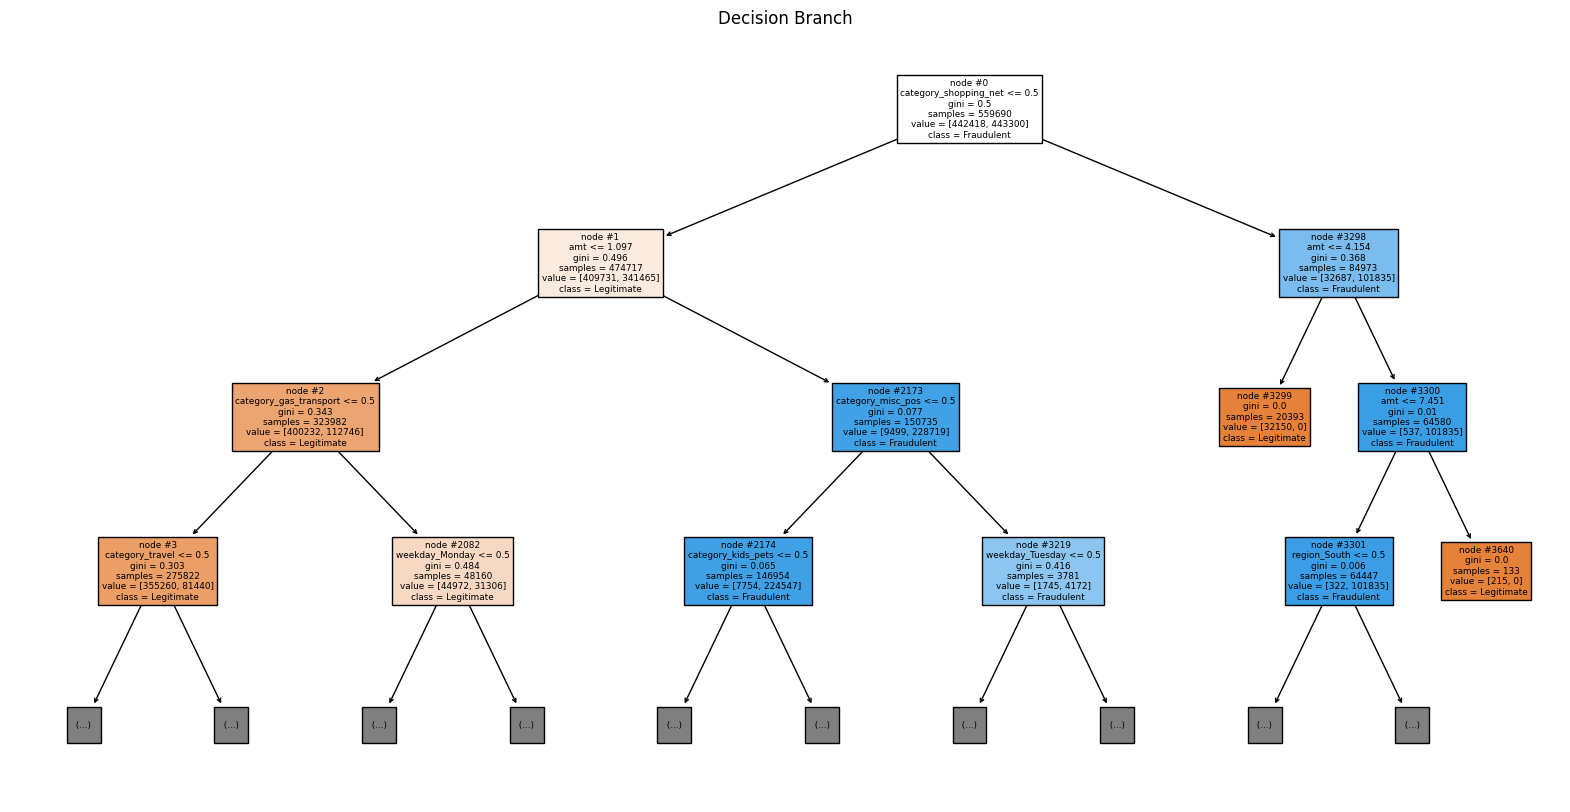

In [ ]:
def plot_decision_branch(tree, root_node, feature_names):
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=feature_names, filled=True, class_names=["Legitimate", "Fraudulent"], max_depth=3, node_ids=True)  # Plot only the first level of the tree
    plt.title("Decision Branch")
    plt.savefig("decision_branch.png", dpi=300)  # Save the plot with higher resolution
    plt.show()

# Plot only one decision lead branch
plot_decision_branch(min_depth_tree, 0, X_test.columns)